In [2]:
! pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import global_variables as gv
import utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from pytorch_tabnet.tab_model import TabNetClassifier

In [13]:
df = pd.read_csv(gv.data_link)
pd.set_option('display.max_columns', None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,1418-0.0,1329-0.0,1220-0.0,1428-0.0,1249-0.0,1349-0.0,1369-0.0,20117-0.0,2100-0.0,2654-0.0,1339-0.0,21000-0.0,2050-0.0,1408-0.0,1200-0.0,1538-0.0,31-0.0,6138-0.0,1359-0.0,1389-0.0,1478-0.0,2090-0.0,1508-0.0,1379-0.0,6142-0.0,1468-0.0,1548-0.0,1239-0.0,1448-0.0,hypertension,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_myocardial_infarction,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,multi-labels,age,gender,race
0,0.50800,3.88800,6.47700,65.1984,45.2,35.6,74.0,25.0,0.34,1.70600,1.21100,35.065,102.0,26.339,5.62200,1.59300,0.97700,24.5790,6.0,77.0,10.0,54.0,7.0,10.0,110.0,3.73,2.0,0.0,23.52,6.0,2.0,3,2,0,0,1,1,1,2,1,6,2,0,2,1,3,2,0,1,2,1,1,1,3,1,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",54,Female,British
1,13.08800,3.52000,5.51200,15.4000,74.6,36.5,120.0,42.9,3.94,1.17300,1.01900,40.900,113.0,10.701,5.05200,1.39000,2.35800,35.0861,2.0,91.0,2.0,65.0,9.0,12.0,166.0,7.00,2.4,0.0,16.00,2.0,1.0,2,2,0,1,1,4,2,2,0,7,2,0,1,3,2,0,1,3,3,1,1,0,2,2,1,5,2,0,1,1,0,1,0,1,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0]",65,Male,British
2,9.73364,4.10892,6.47949,50.8588,71.7,29.7,112.0,30.3,3.88,1.58546,1.22432,84.100,107.0,18.763,13.71763,1.74423,2.78764,30.7934,0.0,99.0,2.0,55.0,7.0,10.0,135.0,7.00,2.0,0.0,21.00,3.0,1.0,2,1,0,0,1,2,1,2,0,7,2,0,1,2,2,1,1,3,3,2,1,0,2,2,1,4,2,0,3,1,0,1,0,0,0,1,1,1,"[0, 0, 1, 0, 0, 1, 1, 1]",55,Male,British
3,1.78800,2.88700,5.56500,56.5183,40.2,29.8,67.0,17.0,0.87,2.11500,0.81000,36.400,91.0,31.672,4.82700,1.89100,1.15700,20.7577,0.0,71.0,5.0,49.0,8.0,14.0,116.0,5.00,3.0,1.0,18.00,5.0,1.0,2,2,0,0,4,1,2,2,0,7,2,2,1,2,1,2,0,6,2,2,1,0,2,2,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",49,Female,Irish
4,0.75600,2.67000,4.68000,4.7700,46.5,30.1,85.0,20.0,0.18,1.49300,0.73300,34.200,105.0,42.209,5.06300,1.86900,1.67700,25.9766,7.0,73.0,4.0,61.0,7.0,2.0,113.0,7.00,4.0,2.0,16.00,3.0,3.0,3,2,1,1,4,1,1,2,0,7,3,0,1,3,1,0,0,3,3,1,2,0,1,1,1,4,2,0,3,1,0,0,0,1,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]",61,Female,British


### Test TabNet Binary Classifier out-of-the-box (predicting Ischemic Heart Disease)

In [14]:
X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, gv.outcomes[2], StandardScaler(), one_hot=False)
X_train, y_train= utilities.resample_data(X_train, y_train, 'under')

In [15]:
clf = TabNetClassifier()  

X_train= X_train.to_numpy()
X_val= X_val.to_numpy()
X_test= X_test.to_numpy()

y_train= y_train.to_numpy()
y_val= y_val.to_numpy()
y_test= y_test.to_numpy()

clf.fit(X_train, y_train,
  eval_set=[(X_val, y_val)]
)
preds = clf.predict(X_test)

Device used : cuda
epoch 0  | loss: 0.69885 | val_0_auc: 0.60073 |  0:00:01s
epoch 1  | loss: 0.66113 | val_0_auc: 0.6572  |  0:00:03s
epoch 2  | loss: 0.65732 | val_0_auc: 0.66561 |  0:00:05s
epoch 3  | loss: 0.65426 | val_0_auc: 0.66791 |  0:00:07s
epoch 4  | loss: 0.6535  | val_0_auc: 0.67087 |  0:00:08s
epoch 5  | loss: 0.65162 | val_0_auc: 0.67551 |  0:00:10s
epoch 6  | loss: 0.65031 | val_0_auc: 0.67722 |  0:00:12s
epoch 7  | loss: 0.64793 | val_0_auc: 0.67902 |  0:00:14s
epoch 8  | loss: 0.64674 | val_0_auc: 0.68555 |  0:00:15s
epoch 9  | loss: 0.64462 | val_0_auc: 0.69061 |  0:00:17s
epoch 10 | loss: 0.64331 | val_0_auc: 0.68607 |  0:00:19s
epoch 11 | loss: 0.64567 | val_0_auc: 0.6825  |  0:00:21s
epoch 12 | loss: 0.64456 | val_0_auc: 0.68884 |  0:00:22s
epoch 13 | loss: 0.64312 | val_0_auc: 0.69157 |  0:00:24s
epoch 14 | loss: 0.64016 | val_0_auc: 0.69185 |  0:00:26s
epoch 15 | loss: 0.63862 | val_0_auc: 0.69515 |  0:00:28s
epoch 16 | loss: 0.63674 | val_0_auc: 0.69647 |  0:00

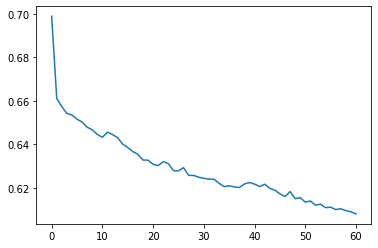

In [16]:
# plot losses
plt.plot(clf.history['loss'])

In [8]:
# plot auc
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])

KeyError: ignored

In [11]:
preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)

In [12]:
clf.feature_importances_

array([4.54833304e-07, 0.00000000e+00, 6.04138205e-02, 1.46892696e-04,
       0.00000000e+00, 0.00000000e+00, 1.29693437e-01, 0.00000000e+00,
       0.00000000e+00, 1.24761754e-01, 7.18124290e-05, 3.97262071e-04,
       0.00000000e+00, 2.57262317e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.02355668e-07, 2.73897415e-03, 6.48526478e-03,
       0.00000000e+00, 5.10263249e-03, 4.54151744e-03, 0.00000000e+00,
       6.71619651e-05, 0.00000000e+00, 5.19090266e-07, 0.00000000e+00,
       2.12189793e-06, 3.65239262e-05, 2.03881780e-03, 0.00000000e+00,
       1.47845790e-02, 0.00000000e+00, 2.55469492e-05, 0.00000000e+00,
       0.00000000e+00, 1.23858534e-04, 9.90689948e-03, 1.00005738e-06,
       0.00000000e+00, 1.98289869e-03, 3.87986864e-04, 3.05056175e-06,
       0.00000000e+00, 2.22042035e-06, 5.14130246e-08, 3.21500869e-08,
       0.00000000e+00, 7.01143827e-04, 8.57026439e-06, 0.00000000e+00,
       4.71858821e-07, 4.70896370e-06, 7.69745659e-07, 5.13893532e-04,
      

## Tuning

In [ ]:
unused_feat = ['Set']

features = [ col for col in train.columns if col not in unused_feat+[target]] 

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]

cat_dims = [ categorical_dims[f] for i, f in enumerat

In [ ]:
tabnet_params = {"cat_idxs":cat_idxs, # list of categorical feature indices
                 "cat_dims":cat_dims, # list of categorical features number of modalities (#unique values for a categorical feature)
                 "cat_emb_dim":1, # list of embeddings size for each categorical features
                 "optimizer_fn":torch.optim.Adam, # pytorch optimizer function
                 "optimizer_params":dict(lr=2e-2), # parameters compatible with optimizer_fn
                 "scheduler_params":{"step_size":50, # how to use learning rate scheduler
                                 "gamma":0.9}, # dictionary of parameters to apply to the scheduler
                 "scheduler_fn":torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax' # "sparsemax" # either sparsemax or entmac, masking fn for selecting features
                }


### Implement Semi-supervised Pre-training (tbd)

In [6]:
# import preprocessed data before imputation

df2 = pd.read_csv(gv.tabnet_data)
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2.head()

,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,...,1448-0.0.1,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,hypertension.1,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia
0,0.508,3.888,6.477,NaN,45.2,35.6,74.0,25.0,0.34,1.706,...,3.0,0,0,0,0,0,0,0,0,1
1,13.088,3.520,5.512,15.40,74.6,36.5,120.0,42.9,3.94,1.173,...,-1.0,1,0,1,0,1,0,0,0,0
2,NaN,NaN,NaN,NaN,71.7,29.7,112.0,30.3,NaN,NaN,...,3.0,0,0,1,0,1,0,1,1,1
3,1.788,2.887,5.565,NaN,40.2,29.8,67.0,17.0,0.87,2.115,...,3.0,0,0,0,0,0,0,0,0,1
4,0.756,2.670,4.680,4.77,46.5,30.1,85.0,20.0,0.18,1.493,...,3.0,1,0,0,0,1,0,0,0,0


#### Fit parameters

<ul>
  <li> <b>X_train</b> (np.array): Training Features </li>
  <li> <b>y_train</b> (np.array): Training Targets </li>
  <li> <b>eval_set</b> (list of eval tuple set):  last one used for early stopping </li>
  <li> <b>eval_name</b> (list of str): list of eval set names </li>
  <li> <b>eval_metric</b> (list of str: list of evaluation metrics; last used for early stopping </li>
  <li> <b>max_epochs</b> (int=200): max epochs for training</li>
  <li> <b>patience</b> (int=10):#epochs before early stopping, if 0 then no early stopping performed </li>
  <li> <b>weights</b> (int or dict=0): only for TabNetClassifier, sampling param 0 => no sampling, param 0 => automated sampling with inverse class occurences </li>
  <li> <b>loss_fn</b>(torch.loss): loss fn for training, w classification can set a list of same length as # tasks  </li>
  <li> <b>batch_size</b> (int=1024): #  examples/batch </li>
  <li> <b>virtual_batch_size</b> (int=128): size of mini batches for ghost batch normalization  </li>
  <li> <b>num_workers</b> (int=0): # workers used in torch.utils.data.Dataloader  </li>
  <li> <b>drop_last</b> (bool=False): whether to drop last batch if not complete during training  </li>
  <li> <b>callbacks</b> (list of callback fn): list of custom callbacks </li>
  <li> <b>pretraining_ratio</b> (float): %input features to mask during pretraining  </li>
  <li> <b>warm_start</b> (bool=False): allows to fit twice the same model and start from a warm start  </li>

</ul>

In [17]:
# 

In [ ]:
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax' # "sparsemax"
)

unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_val],
    pretraining_ratio=0.8,
)

clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    from_unsupervised=unsupervised_model
)

### Save & Load TabNet Classifier

In [ ]:
# save tabnet model
saving_path_name = "./tabnet_model_test_1"
saved_filepath = clf.save_model(saving_path_name)

# define new model with basic parameters and load state dict weights
loaded_clf = TabNetClassifier()
loaded_clf.load_model(saved_filepath)